In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import operator
import random
import seaborn as sns
from collections import Counter
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d  # necessary for 3d projection
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv(r'C:\Users\Geetha\Desktop\Applied ML class\pizza.csv')
data.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [3]:
X = data[data.columns[2:]]
Y = data[data.columns[0]]

In [5]:
#Assigned unique values to brand
Y_dict = dict(zip(Y.unique(), range(0, len(Y.unique()))))
data.brand.replace(Y_dict, inplace=True)
data.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [6]:
print("The dataset has {0} features\\attributes.\nThose features\\attributes are: ".format(len(X.columns)))
print(*(X.columns.array), sep=", ")
print("There are {0} classes within the dataset and a total of {1} instances.".format(len(Y_dict), len(Y)))

The dataset has 7 features\attributes.
Those features\attributes are: 
mois, prot, fat, ash, sodium, carb, cal
There are 10 classes within the dataset and a total of 300 instances.


In [8]:
data.describe()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,4.560000,20841.040000,40.903067,13.373567,20.229533,2.633233,0.669400,22.864767,3.271000
std,2.889214,6962.917222,9.552987,6.434392,8.975658,1.269724,0.370358,18.029722,0.620034
min,0.000000,14003.000000,25.000000,6.980000,4.380000,1.170000,0.250000,0.510000,2.180000
25%,2.000000,14093.750000,30.902500,8.060000,14.770000,1.450000,0.450000,3.467500,2.910000
50%,5.000000,24020.500000,43.300000,10.440000,17.135000,2.225000,0.490000,23.245000,3.215000
75%,7.000000,24110.250000,49.115000,20.022500,21.435000,3.592500,0.702500,41.337500,3.520000
max,9.000000,34045.000000,57.220000,28.480000,47.200000,5.430000,1.790000,48.640000,5.080000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
brand     300 non-null int64
id        300 non-null int64
mois      300 non-null float64
prot      300 non-null float64
fat       300 non-null float64
ash       300 non-null float64
sodium    300 non-null float64
carb      300 non-null float64
cal       300 non-null float64
dtypes: float64(7), int64(2)
memory usage: 21.2 KB


In [11]:
#unique values of column Brand.
u_brand=data['brand'].unique()
u_brand

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

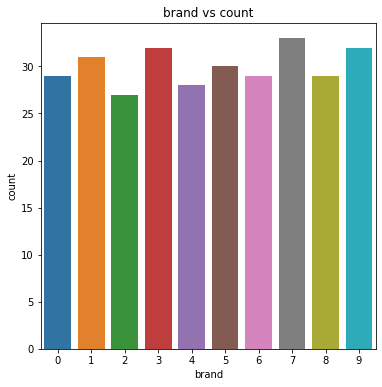

In [16]:
#brand Vs Count
plt.figure(figsize = (6,6))
plt.title('brand vs count')
sns.countplot(x='brand',data=data)

In [14]:
#test train split- default(75%, 25%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

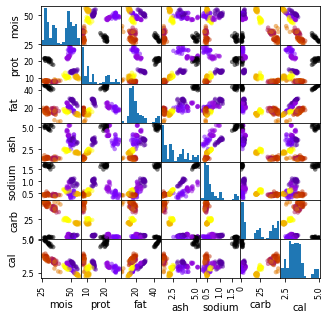

In [17]:
#Relation between independent variables
cmap = cm.get_cmap('gnuplot')
scatterHist = scatter_matrix(X_train, c=Y_train, marker='o', s=20, hist_kwds={'bins': 15}, figsize=(5, 5), cmap=cmap)

In [19]:
#Verifying for best combination
numberNeighbors = [3, 5, 7]
weights = ['uniform', 'distance']
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
leafSizes = [10, 20, 30]    # for BallTree and KDTree
powers = [1, 2] # manhattan distance and euclidean distance
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
bestKNN = []
bestScore = 0
for number in numberNeighbors:
    for weight in weights:
        for algorithm in algorithms:
            for size in leafSizes:
                for power in powers:
                    for metric in metrics:
                        currentKNN = KNeighborsClassifier(number, weight, algorithm, size, power, metric)
                        currentKNN.fit(X_train, Y_train)
                        currentScore = currentKNN.score(X_test, Y_test)
                        if currentScore > bestScore:
                            bestScore = currentScore
                            bestKNN.clear()
                            bestKNN.append(currentKNN)
                        elif currentScore == bestScore:
                            bestKNN.append(currentKNN)
                        else:
                            continue
print("Accuracy of model is: ", bestScore)

Accuracy of model is:  0.8133333333333334


In [21]:
#Printing unique predictions
predictions = []
parametersUsed = []
parameterCounts = {}

for knn in bestKNN:
    predictions.append(knn.predict(X_test))
    parametersUsed.append(knn.get_params())

parameterNames = list(parametersUsed[0].keys())
for name in parameterNames:
    parameterCounts[name] = []
    for parameterSet in parametersUsed:
        for parameter in parameterSet:
            if parameter == name:
                parameterCounts[name].append(parameterSet[parameter])
counts = {}
uniquePredictions = np.unique(predictions, axis=0)
print("Unique brand Predictions out of all combinations:\n", uniquePredictions)

Unique Predictions out of all combinations:
 [[7 6 0 7 8 4 4 4 1 3 9 0 6 8 0 2 9 3 7 5 5 3 7 7 7 3 6 9 7 9 3 2 0 7 7 5
  5 6 9 0 7 3 2 1 1 4 4 2 0 1 2 4 5 3 1 8 6 0 9 6 7 7 2 9 9 4 8 3 0 1 5 7
  9 0 7]
 [7 6 0 7 8 4 7 4 1 3 9 0 6 8 0 2 9 3 4 5 5 3 7 7 4 3 6 9 7 9 3 2 0 7 7 5
  5 6 9 0 7 3 2 1 1 4 4 2 0 1 2 7 5 3 1 8 6 0 9 6 7 7 2 9 9 4 8 3 0 1 5 7
  9 0 7]
 [7 6 0 7 8 4 7 4 1 3 9 0 6 8 0 2 9 3 7 5 5 3 7 7 4 3 6 9 7 9 3 2 0 7 7 5
  5 6 9 0 4 3 2 1 1 4 7 2 0 1 2 7 5 3 1 8 6 0 9 6 7 7 2 9 9 4 8 3 0 1 5 4
  9 0 7]]


In [22]:
for parameter in parameterCounts:
    counts[parameter] = dict(Counter(parameterCounts[parameter]).items())

In [23]:
#Choose one Max value combination 
test = {}
parametersToUse = {}

for parameter in counts:
    test[parameter] = max(counts[parameter].items(), key=operator.itemgetter(1))[0]
if test in parametersUsed:
    parametersToUse = test
else:
    parametersToUse = random.choice(parametersUsed)
print(parametersToUse)

{'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


In [32]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
#K Fold Cross validation(k=5)
knnToUse = KNeighborsClassifier().set_params(**parametersToUse)
kfScores = []
kfScore = 0
kf = KFold(n_splits=5, shuffle=True) # Define the split into 5 folds
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    knnToUse.fit(X_train, Y_train)
    kfScore += knnToUse.score(X_test, Y_test)

kfScore = kfScore/kf.get_n_splits(X)
kfCrossScores = cross_val_score(knnToUse, X, Y)
kfPredictions = cross_val_predict(knnToUse, X, Y)
#kfAccuracy = r2_score(Y, kfPredictions)
print(kfScore)

0.85


In [31]:
#Leave one out method
looScore = 0
loo = LeaveOneOut()
loo.get_n_splits(X)
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    knnToUse.fit(X_train, Y_train)
    looScore += knnToUse.score(X_test, Y_test)

looScore = looScore/loo.get_n_splits(X)
print(looScore)

0.8733333333333333
